In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
#Importing Libraries
import pandas as pd
import numpy as np

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import MinMaxScaler

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

!pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
#extracting data
df = pd.read_csv("/content/drive/MyDrive/bank.csv", sep = ',',encoding = "ISO-8859-1", header= 0)
df.head()

,Unnamed: 0,Account_No,DATE,TRANSACTION_DETAILS,CHQ.NO.,VALUE_DATE,WITHDRAWAL_AMT,DEPOSIT_AMT,BALANCE_AMT
0,0,409000611086,29-Jun-17,TRF FROM Indiaforensic SERVICES,NaN,29-Jun-17,NaN,"1,000,000.00","1,000,000.00"
1,1,409000611089,5-Jul-17,TRF FROM Indiaforensic SERVICES,NaN,5-Jul-17,NaN,"1,000,000.00","2,000,000.00"
2,2,409000611122,18-Jul-17,FDRL/INTERNAL FUND TRANSFE,NaN,18-Jul-17,NaN,"500,000.00","2,500,000.00"
3,3,409000611090,1-Aug-17,TRF FRM Indiaforensic SERVICES,NaN,1-Aug-17,NaN,"3,000,000.00","5,500,000.00"
4,4,409000611123,16-Aug-17,FDRL/INTERNAL FUND TRANSFE,NaN,16-Aug-17,NaN,"500,000.00","6,000,000.00"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116201 entries, 0 to 116200
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           116201 non-null  int64  
 1   Account_No           116201 non-null  int64  
 2   DATE                 116201 non-null  object 
 3   TRANSACTION_DETAILS  113702 non-null  object 
 4   CHQ.NO.              905 non-null     float64
 5   VALUE_DATE           116201 non-null  object 
 6   WITHDRAWAL_AMT       53549 non-null   object 
 7   DEPOSIT_AMT          62652 non-null   object 
 8   BALANCE_AMT          116201 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 8.0+ MB


As we can see cheque number does have some entries, also for withdrawal and deposites.

In [5]:
#dropping transaction detail
df =df.drop(['TRANSACTION_DETAILS'], axis=1)

In [6]:
#checking if value date and date is same
df['VALUE_DATE'].equals(df['DATE'])

False

In [7]:
#finding out the difference
df['is_equal']= (df['VALUE_DATE']==df['DATE'])
df['is_equal'].value_counts()

True     116066
False       135
Name: is_equal, dtype: int64

In [8]:
#analysing unequal dates
df[~df['is_equal']]

,Unnamed: 0,Account_No,DATE,CHQ.NO.,VALUE_DATE,WITHDRAWAL_AMT,DEPOSIT_AMT,BALANCE_AMT,is_equal
27377,27377,409000611139,21-Jul-15,NaN,20-Jul-15,"40,000,000.00",NaN,"-1,015,416,030.40",False
29942,29942,409000611141,15-Oct-15,NaN,14-Oct-15,"15,000,000.00",NaN,"-1,475,668,162.28",False
32528,32528,409000611139,22-Feb-16,NaN,20-Feb-16,"15,000,000.00",NaN,"-1,563,515,047.80",False
34732,34732,409000611120,1-Aug-16,NaN,31-Jul-16,"6,245,376.00",NaN,"-1,563,884,588.50",False
35175,35175,409000611098,3-Oct-16,NaN,30-Sep-16,"80,000,000.00",NaN,"-2,025,587,880.41",False
...,...,...,...,...,...,...,...,...,...
110719,110719,409000611124,2-Feb-18,NaN,1-Feb-18,"1,357,548.00",NaN,"-1,894,803,766.38",False
111776,111776,409000611095,10-Apr-18,NaN,9-Apr-18,NaN,"1,810,584.00","-1,930,502,401.10",False
112081,112081,409000611080,27-Apr-18,NaN,9-Apr-18,"9,176,351.00",NaN,"-1,886,386,493.12",False
113157,113157,409000611107,23-Jun-18,NaN,22-Jun-18,"20,500.00",NaN,"-1,867,826,004.68",False


In [9]:
#dropping date
df=df.drop(['DATE'], axis=1)

In [10]:
#removing characters
df['DEPOSIT_AMT'] = df['DEPOSIT_AMT'].str.replace(',','')
df['WITHDRAWAL_AMT'] = df['WITHDRAWAL_AMT'].str.replace(',','')
df.head(15)

,Unnamed: 0,Account_No,CHQ.NO.,VALUE_DATE,WITHDRAWAL_AMT,DEPOSIT_AMT,BALANCE_AMT,is_equal
0,0,409000611086,NaN,29-Jun-17,NaN,1000000.00,"1,000,000.00",True
1,1,409000611089,NaN,5-Jul-17,NaN,1000000.00,"2,000,000.00",True
2,2,409000611122,NaN,18-Jul-17,NaN,500000.00,"2,500,000.00",True
3,3,409000611090,NaN,1-Aug-17,NaN,3000000.00,"5,500,000.00",True
4,4,409000611123,NaN,16-Aug-17,NaN,500000.00,"6,000,000.00",True
5,5,409000611081,NaN,16-Aug-17,NaN,500000.00,"6,500,000.00",True
6,6,409000611075,NaN,16-Aug-17,NaN,500000.00,"7,000,000.00",True
7,7,409000611106,NaN,16-Aug-17,NaN,500000.00,"7,500,000.00",True
8,8,409000611087,NaN,16-Aug-17,NaN,500000.00,"8,000,000.00",True
9,9,409000611086,NaN,16-Aug-17,NaN,500000.00,"8,500,000.00",True


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116201 entries, 0 to 116200
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      116201 non-null  int64  
 1   Account_No      116201 non-null  int64  
 2   CHQ.NO.         905 non-null     float64
 3   VALUE_DATE      116201 non-null  object 
 4   WITHDRAWAL_AMT  53549 non-null   object 
 5   DEPOSIT_AMT     62652 non-null   object 
 6   BALANCE_AMT     116201 non-null  object 
 7   is_equal        116201 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(4)
memory usage: 6.3+ MB


In [12]:
#filling null value with 0
df=df.fillna(0)

In [13]:
#Changing data type of WITHDRAWAL_AMT and DEPOSIT_AMT
df['WITHDRAWAL_AMT'] = df['WITHDRAWAL_AMT'].astype(float)
df['DEPOSIT_AMT'] = df['DEPOSIT_AMT'].astype(float)

In [14]:
#Calculating total amount
df['WITHDRAWAL_AMT'] =-df['WITHDRAWAL_AMT']
df['amount'] = df['WITHDRAWAL_AMT'] + df['DEPOSIT_AMT']

In [15]:
#Changing the value date into datetime format
df['VALUE_DATE'] = pd.to_datetime(df['VALUE_DATE'])

In [16]:
df

,Unnamed: 0,Account_No,CHQ.NO.,VALUE_DATE,WITHDRAWAL_AMT,DEPOSIT_AMT,BALANCE_AMT,is_equal,amount
0,0,409000611086,0.0,2017-06-29,-0.00,1000000.0,"1,000,000.00",True,1000000.00
1,1,409000611089,0.0,2017-07-05,-0.00,1000000.0,"2,000,000.00",True,1000000.00
2,2,409000611122,0.0,2017-07-18,-0.00,500000.0,"2,500,000.00",True,500000.00
3,3,409000611090,0.0,2017-08-01,-0.00,3000000.0,"5,500,000.00",True,3000000.00
4,4,409000611123,0.0,2017-08-16,-0.00,500000.0,"6,000,000.00",True,500000.00
...,...,...,...,...,...,...,...,...,...
116196,116196,409000611138,0.0,2019-03-05,-117934.30,0.0,"-1,901,902,092.61",True,-117934.30
116197,116197,409000611107,0.0,2019-03-05,-0.00,300000.0,"-1,901,602,092.61",True,300000.00
116198,116198,409000611131,0.0,2019-03-05,-0.00,300000.0,"-1,901,302,092.61",True,300000.00
116199,116199,409000611106,0.0,2019-03-05,-109868.65,0.0,"-1,901,411,961.26",True,-109868.65


In [17]:
print(df['VALUE_DATE'].min())
print(df['VALUE_DATE'].max())

2015-01-01 00:00:00
2019-03-05 00:00:00


In [18]:
#calculating total month
(df['VALUE_DATE'].max().year - df['VALUE_DATE'].min().year) * 12 + df['VALUE_DATE'].max().month - df['VALUE_DATE'].min().month

50

In [19]:
#Sorting data in terms of date
df =df.sort_values(by='VALUE_DATE')

In [20]:
#assigning month value to the dataset
df['months'] = ((df['VALUE_DATE'] - df['VALUE_DATE'].min())/np.timedelta64(1, 'M'))
df['months'] = df['months'].astype(int)

In [21]:
df['months'].value_counts

<bound method IndexOpsMixin.value_counts of 37582      0
27046      0
37583      0
37592      0
37591      0
          ..
86355     50
86356     50
86357     50
86349     50
116200    50
Name: months, Length: 116201, dtype: int64>

In [22]:
#calculating quarters
df['quaters'] = df['months']//3
df

,Unnamed: 0,Account_No,CHQ.NO.,VALUE_DATE,WITHDRAWAL_AMT,DEPOSIT_AMT,BALANCE_AMT,is_equal,amount,months,quaters
37582,37582,409000611141,0.0,2015-01-01,-0.00,1200000.0,"-1,585,715,589.25",True,1200000.00,0,0
27046,27046,409000611130,0.0,2015-01-01,-0.00,4999.0,"-539,958,121.61",True,4999.00,0,0
37583,37583,409000611076,0.0,2015-01-01,-0.00,800000.0,"-1,584,915,589.25",True,800000.00,0,0
37592,37592,409000611092,0.0,2015-01-02,-0.00,700000.0,"-1,587,953,025.43",True,700000.00,0,0
37591,37591,409000611095,0.0,2015-01-02,-0.00,172620.0,"-1,588,653,025.43",True,172620.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
86355,86355,409000611128,0.0,2019-03-05,-0.00,300000.0,"-1,686,924,331.83",True,300000.00,50,16
86356,86356,409000611094,0.0,2019-03-05,-300000.00,0.0,"-1,687,224,331.83",True,-300000.00,50,16
86357,86357,409000611140,0.0,2019-03-05,-300000.00,0.0,"-1,687,524,331.83",True,-300000.00,50,16
86349,86349,409000611079,0.0,2019-03-05,-568342.08,0.0,"-1,686,542,484.13",True,-568342.08,50,16


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116201 entries, 37582 to 116200
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Unnamed: 0      116201 non-null  int64         
 1   Account_No      116201 non-null  int64         
 2   CHQ.NO.         116201 non-null  float64       
 3   VALUE_DATE      116201 non-null  datetime64[ns]
 4   WITHDRAWAL_AMT  116201 non-null  float64       
 5   DEPOSIT_AMT     116201 non-null  float64       
 6   BALANCE_AMT     116201 non-null  object        
 7   is_equal        116201 non-null  bool          
 8   amount          116201 non-null  float64       
 9   months          116201 non-null  int64         
 10  quaters         116201 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(4), int64(4), object(1)
memory usage: 9.9+ MB


In [24]:
#calculating amount
dnew  = pd.DataFrame(df['Account_No'].unique())
dnew.columns= ['Account_No']

count = 0
da= pd.DataFrame()
for i in range(df['quaters'].max()):
  dd= df.loc[df['quaters'] == count]
  da= dd.groupby('Account_No').amount.sum()
  da = da.reset_index()
  da = da.rename({'amount': count}, axis=1)
  dnew = pd.merge(dnew, da, on = "Account_No", how = "right")
  #dnew = pd.merge(dnew, da, on='Account_No')
  count= count+1

dnew= dnew.fillna(0)
damount = dnew
damount

,Account_No,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,409000611074,4203943.82,-11490390.00,8.733712e+07,2.536610e+08,4.690768e+08,-7.375795e+06,1.050379e+08,-1.598346e+08,1.902112e+08,8.548951e+07,8.020185e+07,9.868881e+07,-2.162462e+07,-61418514.53,-11557802.97,48097562.99
1,409000611075,15428380.00,9870710.00,-1.000492e+08,-2.049409e+08,-1.972218e+08,-5.779469e+07,1.638863e+07,-2.000494e+08,1.083357e+08,2.032662e+08,1.280361e+08,2.490992e+07,1.453486e+08,87648475.26,-3492139.20,-6107141.84
2,409000611076,890170.00,3069830.00,8.408836e+07,4.737020e+07,-3.028077e+07,1.141720e+08,-1.308381e+08,-3.761187e+07,5.087516e+07,3.709875e+07,-3.833347e+07,-1.161894e+08,6.228401e+07,-28351154.31,-21649018.81,-44442742.03
3,409000611077,-9781000.00,-12137870.00,5.835372e+07,1.903049e+07,-2.128076e+08,7.937857e+07,7.037210e+07,-6.177856e+07,-1.131794e+08,-5.797782e+07,3.718668e+07,1.250127e+08,-1.755808e+07,-37698694.99,-45669221.65,31334.13
4,409000611078,-1486630.00,4804404.00,8.092732e+07,-9.410098e+07,-2.192283e+08,-1.420186e+08,-1.694297e+08,-3.299070e+07,-1.007783e+08,9.049595e+07,2.121175e+08,-1.232170e+08,-1.296020e+07,-26008766.70,45374587.24,-1045597.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,409000611140,-18911000.00,-18354690.00,2.249262e+08,-6.114253e+07,1.762446e+08,-1.101791e+07,-1.477196e+08,1.283621e+08,-3.162645e+07,9.364757e+07,-1.370526e+08,1.041148e+08,-1.164224e+08,69808911.79,61864700.63,12999705.28
67,409000611141,17314770.00,7063800.00,-3.177878e+08,-4.804540e+07,-4.112650e+06,3.622315e+07,-4.514813e+07,2.649680e+07,2.372282e+07,2.141654e+07,9.028146e+07,2.203903e+07,1.096876e+07,-32392577.08,24815672.47,-68975931.66
68,409000611142,4930040.00,-5828433.24,1.540563e+08,-3.848543e+07,1.404083e+08,-2.938168e+07,4.471993e+07,-1.369577e+08,1.590464e+08,-9.919158e+07,7.164959e+06,1.162761e+08,9.786972e+06,-4114012.52,815866.24,-27527742.35
69,409000611143,-249800.00,-67250.00,-1.037882e+07,-4.786018e+06,-3.009838e+07,5.167973e+07,-4.258985e+07,-2.167994e+08,-8.755638e+07,4.395811e+05,2.053620e+07,2.206685e+07,2.446607e+08,56543878.87,-30687785.98,-12412667.92


In [25]:
#calculating frequency
dnew  = pd.DataFrame(df['Account_No'].unique())
dnew.columns= ['Account_No']

count = 0
for i in range(df['quaters'].max()):
  dd= df.loc[df['quaters'] == count]
  da= dd.groupby('Account_No').VALUE_DATE.count()
  da = da.reset_index()
  da = da.rename({'VALUE_DATE': count}, axis=1)
  dnew = pd.merge(dnew, da, on = "Account_No", how = "right")
  #dnew = pd.merge(dnew, da, on='Account_No')
  count= count+1

dnew= dnew.fillna(0)
dfreq = dnew
dfreq

,Account_No,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,409000611074,14,19,82,96,103,108,105,101,105,94,123,105,89,135,161,115
1,409000611075,12,23,85,123,102,136,99,111,126,91,127,111,101,149,166,105
2,409000611076,8,18,78,108,122,126,109,103,123,102,95,123,96,125,175,123
3,409000611077,8,20,76,105,101,125,102,96,116,75,112,100,91,113,137,128
4,409000611078,12,14,88,90,115,125,93,89,118,79,100,119,90,115,151,132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,409000611140,15,15,104,95,118,116,88,105,115,81,122,104,103,137,162,135
67,409000611141,17,20,88,110,104,138,104,97,106,71,124,110,89,104,161,133
68,409000611142,15,17,97,114,105,137,90,86,123,73,111,98,97,119,162,139
69,409000611143,15,12,100,82,92,128,94,96,118,89,102,102,86,117,147,103


In [26]:
#calculating recency
dnew  = pd.DataFrame(df['Account_No'].unique())
dnew.columns= ['Account_No']

count = 0
for i in range(df['quaters'].max()):
  dd= df.loc[df['quaters'] == count]
  maximum = max(dd.VALUE_DATE)
  maximum = maximum + pd.DateOffset(days=1)
  dd['diff'] = maximum - dd.VALUE_DATE
  da = pd.DataFrame(dd.groupby('Account_No')['diff'].min())
  da = da.reset_index()
  da.columns = ["Account_No", count]
  dnew = pd.merge(dnew, da, on = "Account_No", how = "right")
  count= count+1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [27]:
#filling null with total days in the quarter
dnew[[0,4,8,12]] = dnew[[0,4,8,12]].fillna(pd.Timedelta(days=90))
dnew[[1,5,9,13]] = dnew[[1,5,9,13]].fillna(pd.Timedelta(days=91))
dnew[[2,3,6,7,10,11,14,15]] = dnew[[2,3,6,7,10,11,14,15]].fillna(pd.Timedelta(days=92))

In [28]:
recency=dnew

In [29]:
recency['Account_No'].value_counts

<bound method IndexOpsMixin.value_counts of 0     409000611074
1     409000611075
2     409000611076
3     409000611077
4     409000611078
          ...     
66    409000611140
67    409000611141
68    409000611142
69    409000611143
70    409000611144
Name: Account_No, Length: 71, dtype: int64>

In [30]:
#changing data type to int
damount[0]= damount[0].astype(int)
dfreq[0]= dfreq[0].astype(int)

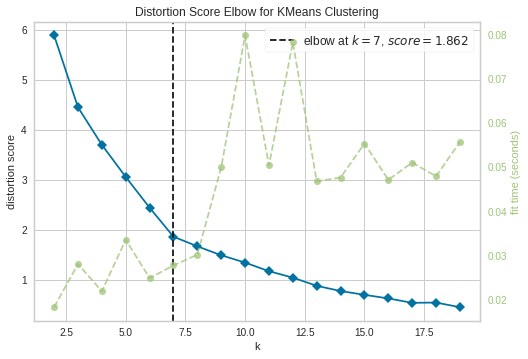

In [31]:
#cluster number
q1  = pd.DataFrame(df['Account_No'].unique())
q1.columns= ['Account_No']

qq = pd.DataFrame(q1['Account_No'])
qq = pd.merge(qq, damount[['Account_No',3]], on = "Account_No", how = "right")
qq = pd.merge(qq, dfreq[['Account_No',3]], on = "Account_No", how = "right")
qq = pd.merge(qq, recency[['Account_No',3]], on = "Account_No", how = "right")
qq.columns = ["Account_No", 'amount','frequency', 'recency']

RFM = qq.drop(["Account_No"], axis=1)
RFM.recency = RFM.recency.dt.days
sc = MinMaxScaler((0, 1))
d1 = sc.fit_transform(RFM)

from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k=(2, 20))
visu.fit(d1)
visu.show()

In [32]:
#k-means clustering
count = 0
a=16

for i in range(a):
  q2 = pd.DataFrame(q1['Account_No'])
  q2 = pd.merge(q2, damount[['Account_No',count]], on = "Account_No", how = "right")
  q2 = pd.merge(q2, dfreq[['Account_No',count]], on = "Account_No", how = "right")
  q2 = pd.merge(q2, recency[['Account_No',count]], on = "Account_No", how = "right")
  q2.columns = ["Account_No", 'amount','frequency', 'recency']

  RFM_norm1 = q2.drop(["Account_No"], axis=1)
  RFM_norm1.recency = RFM_norm1.recency.dt.days
  sc = MinMaxScaler((0, 1))
  d1 = sc.fit_transform(RFM_norm1)
  kmeans = KMeans(n_clusters= 7, init= 'k-means++', max_iter= 1000)
  kmeans.fit(d1)
  clusters = kmeans.labels_
  q1[count]= clusters
  q1[count] = clusters + 1
  count = count + 1



In [33]:
q1.set_index("Account_No", inplace = True)
q1 = q1.sort_values(by=['Account_No'])
q1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Account_No,,,,,,,,,,,,,,,,
409000611074,3,5,2,1,4,6,2,1,2,1,5,4,7,3,3,1
409000611075,6,6,3,2,5,3,4,5,3,5,2,2,1,2,6,3
409000611076,2,1,1,7,7,6,7,3,2,5,4,7,1,1,4,1
409000611077,1,5,1,2,2,1,3,7,2,2,1,1,1,4,4,4
409000611078,5,5,6,3,5,5,2,2,2,2,1,7,1,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409000611140,4,1,2,7,7,6,3,7,1,7,1,5,4,6,3,1
409000611141,6,1,1,4,3,5,3,3,6,5,5,1,2,1,1,6
409000611142,3,5,1,2,2,5,1,3,7,1,1,3,3,2,5,6


In [34]:
#creating dataframe with values from 0 to 15
d = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
corr = pd.DataFrame(columns=['quaters'] ,data=d)

In [35]:
#corr.set_index("quaters", inplace = True)

In [36]:
#calculating amount in each quater
a=16
count=0
for i in range(a):
  d[count] = damount[count].sum()
  #corr.insert(loc = a, column = 'amount', value = sum)
  count = count + 1

corr['sum'] = d
corr

,quaters,sum
0,0,-5.894660e+05
1,1,-3.207280e+08
2,2,-5.027165e+08
3,3,-4.508582e+08
4,4,2.793839e+08
5,5,-1.429058e+08
6,6,-4.100853e+08
7,7,-1.115370e+08
8,8,-4.813416e+07
9,9,4.722857e+08


In [37]:
#calculating correlation beteen amount and cluster
count=0
d = [None] * 71
a = 409000611074
for i in range(len(q1)) :
  ro = np.array(q1.loc[a])
  ra = pd.DataFrame(columns=['cluster'], data =ro)
  r1 =np.corrcoef(ra['cluster'], corr['sum'])[0,1]
  d[count] = r1
  a= a+1
  count = count + 1

q1['correlation'] = d
q1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,correlation
Account_No,,,,,,,,,,,,,,,,,
409000611074,3,5,2,1,4,6,2,1,2,1,5,4,7,3,3,1,0.100980
409000611075,6,6,3,2,5,3,4,5,3,5,2,2,1,2,6,3,0.211966
409000611076,2,1,1,7,7,6,7,3,2,5,4,7,1,1,4,1,0.172137
409000611077,1,5,1,2,2,1,3,7,2,2,1,1,1,4,4,4,-0.208307
409000611078,5,5,6,3,5,5,2,2,2,2,1,7,1,1,4,1,-0.071688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409000611140,4,1,2,7,7,6,3,7,1,7,1,5,4,6,3,1,0.257954
409000611141,6,1,1,4,3,5,3,3,6,5,5,1,2,1,1,6,0.407699
409000611142,3,5,1,2,2,5,1,3,7,1,1,3,3,2,5,6,0.038559


In [38]:
d

[0.10097970263984028,
 0.21196570561445058,
 0.17213712689891675,
 -0.20830669016186784,
 -0.07168763463500782,
 0.005552924358029144,
 -0.27716529542284307,
 0.0902534277110035,
 -0.2564206408100981,
 0.15702331802944264,
 0.1926962381946133,
 -0.04499835202741102,
 0.3914131489895471,
 -0.29793064553847326,
 0.009228989633796373,
 -0.3735201024457035,
 0.23756124284681895,
 -0.2457436791070473,
 0.13357067790721247,
 0.5914951479718961,
 -0.18320205880872942,
 0.41356445863316066,
 -0.24111074994824266,
 0.06059430007246868,
 -0.3253364964251957,
 0.24626976693455185,
 0.4054024924118298,
 -0.053845530165364065,
 -0.0760553796390294,
 -0.2907055084708573,
 0.1275726112515222,
 0.08787870786626213,
 0.3936846620107686,
 -0.35723389846747977,
 0.22816600595854286,
 -0.2145804422689789,
 0.06948336523315321,
 0.40741060695281306,
 -0.45839300513920267,
 -0.14648974912532348,
 0.1083027980149486,
 0.08138583650770786,
 -0.5182890962524836,
 0.27811510045607896,
 0.44326173434928234,
 -0.

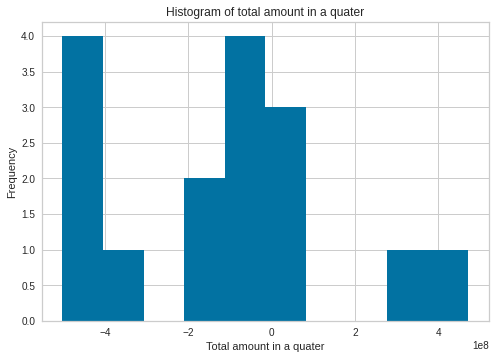

In [39]:
#visualising Histogram of total amount in a quate
plt.hist(corr['sum'])
plt.xlabel("Total amount in a quater")
plt.ylabel("Frequency")
plt.title("Histogram of total amount in a quater")
plt.show()

In [40]:
#divinding quaters into 4 parts
corr['year_quater'] = corr['quaters'] % 4
corr

,quaters,sum,year_quater
0,0,-5.894660e+05,0
1,1,-3.207280e+08,1
2,2,-5.027165e+08,2
3,3,-4.508582e+08,3
4,4,2.793839e+08,0
5,5,-1.429058e+08,1
6,6,-4.100853e+08,2
7,7,-1.115370e+08,3
8,8,-4.813416e+07,0
9,9,4.722857e+08,1


In [41]:
#corr['core_avsq'] =np.corrcoef(corr['year_quater'], corr['sum'])[0,1]

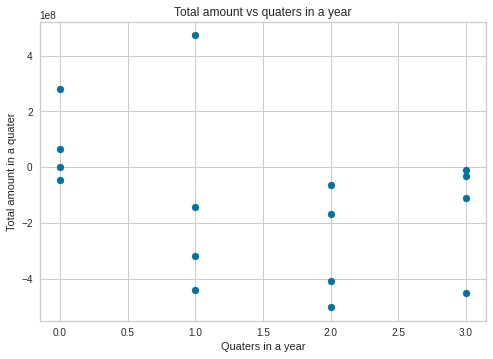

In [42]:
#scatterplot for Total amount vs quaters in a year
plt.scatter(corr['year_quater'], corr['sum'])
plt.xlabel("Quaters in a year")
plt.ylabel("Total amount in a quater")
plt.title("Total amount vs quaters in a year")
plt.show()

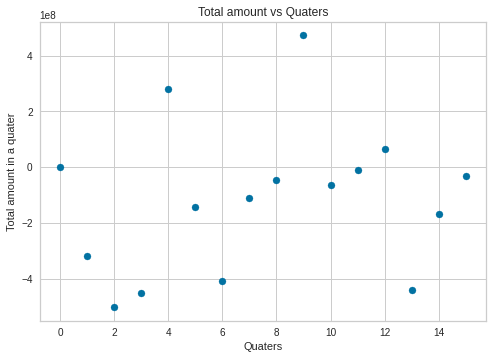

In [43]:
#scatter plot for Total amount vs Quaters
plt.scatter(corr['quaters'], corr['sum'])
plt.xlabel("Quaters")
plt.ylabel("Total amount in a quater")
plt.title("Total amount vs Quaters")
plt.show()

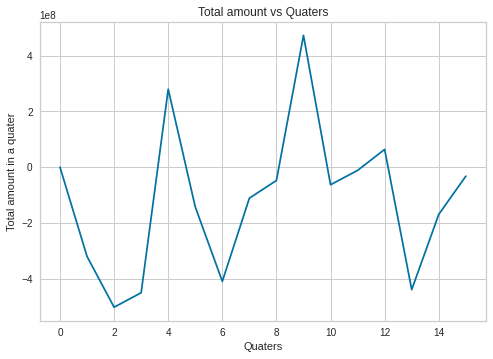

In [44]:
#line plot for Total amount vs Quaters
plt.plot(corr['quaters'], corr['sum'])
plt.xlabel("Quaters")
plt.ylabel("Total amount in a quater")
plt.title("Total amount vs Quaters")
plt.show()

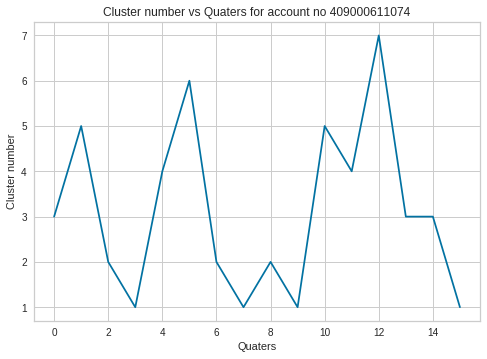

In [46]:
#line plot of Cluster number vs Quaters for an account

p12 = q1.drop(['correlation'], axis=1)
po = np.array(p12.loc[409000611074])
corr['segme'] = po
#plt.plot(corr['quaters'], corr['sum'],label = "line 1")
plt.plot(corr['quaters'], corr['segme'],label = "line 2")
plt.xlabel("Quaters")
plt.ylabel("Cluster number")
plt.title("Cluster number vs Quaters for account no 409000611074")
#plt.legend()
plt.show()

In [47]:
corr

,quaters,sum,year_quater,segme
0,0,-5.894660e+05,0,3
1,1,-3.207280e+08,1,5
2,2,-5.027165e+08,2,2
3,3,-4.508582e+08,3,1
4,4,2.793839e+08,0,4
5,5,-1.429058e+08,1,6
6,6,-4.100853e+08,2,2
7,7,-1.115370e+08,3,1
8,8,-4.813416e+07,0,2
9,9,4.722857e+08,1,1


In [48]:
#finding positive correlated accounts
posco =q1.loc[q1['correlation']>0]
posco.count()

0              40
1              40
2              40
3              40
4              40
5              40
6              40
7              40
8              40
9              40
10             40
11             40
12             40
13             40
14             40
15             40
correlation    40
dtype: int64

In [49]:
posco.reset_index(drop=False, inplace=True)

In [50]:
posco

,Account_No,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,correlation
0,409000611074,3,5,2,1,4,6,2,1,2,1,5,4,7,3,3,1,0.100980
1,409000611075,6,6,3,2,5,3,4,5,3,5,2,2,1,2,6,3,0.211966
2,409000611076,2,1,1,7,7,6,7,3,2,5,4,7,1,1,4,1,0.172137
3,409000611079,7,1,3,6,2,1,2,7,5,2,3,2,4,1,1,1,0.005553
4,409000611081,2,6,6,4,2,6,2,7,7,7,2,4,4,2,3,2,0.090253
5,409000611083,1,6,5,2,5,4,3,1,3,5,3,7,3,3,5,4,0.157023
6,409000611084,5,1,7,1,6,1,3,4,3,4,1,2,4,3,1,1,0.192696
7,409000611086,5,1,3,1,5,5,5,4,1,7,2,3,4,6,3,3,0.391413
8,409000611088,6,2,7,2,5,6,1,3,5,1,4,1,5,3,3,6,0.009229
9,409000611090,1,2,7,4,7,5,1,3,5,7,4,2,1,3,4,1,0.237561


In [51]:
ac = np.array(posco['Account_No'])

In [52]:
ac

array([409000611074, 409000611075, 409000611076, 409000611079,
       409000611081, 409000611083, 409000611084, 409000611086,
       409000611088, 409000611090, 409000611092, 409000611093,
       409000611095, 409000611097, 409000611099, 409000611100,
       409000611104, 409000611105, 409000611106, 409000611108,
       409000611110, 409000611111, 409000611114, 409000611115,
       409000611117, 409000611118, 409000611122, 409000611125,
       409000611126, 409000611127, 409000611128, 409000611132,
       409000611134, 409000611135, 409000611136, 409000611138,
       409000611140, 409000611141, 409000611142, 409000611144])

In [58]:
#calculating total ammount for each quaters for the 40
count=0
total= pd.DataFrame()
dnew= pd.DataFrame()
for i in range(len(ac)) :
  a= ac[count]
  dnew =damount.loc[damount['Account_No'] == a]
  total= total.append(dnew, ignore_index=True)
  count = count + 1

In [59]:
total

,Account_No,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,409000611074,4203943,-11490390.00,8.733712e+07,2.536610e+08,4.690768e+08,-7.375795e+06,1.050379e+08,-1.598346e+08,1.902112e+08,8.548951e+07,8.020185e+07,9.868881e+07,-2.162462e+07,-6.141851e+07,-1.155780e+07,4.809756e+07
1,409000611075,15428380,9870710.00,-1.000492e+08,-2.049409e+08,-1.972218e+08,-5.779469e+07,1.638863e+07,-2.000494e+08,1.083357e+08,2.032662e+08,1.280361e+08,2.490992e+07,1.453486e+08,8.764848e+07,-3.492139e+06,-6.107142e+06
2,409000611076,890170,3069830.00,8.408836e+07,4.737020e+07,-3.028077e+07,1.141720e+08,-1.308381e+08,-3.761187e+07,5.087516e+07,3.709875e+07,-3.833347e+07,-1.161894e+08,6.228401e+07,-2.835115e+07,-2.164902e+07,-4.444274e+07
3,409000611079,-7111000,26255200.00,6.667782e+07,2.496872e+07,-1.286127e+08,-3.385126e+08,5.130390e+07,-2.534985e+08,-5.143621e+07,3.581786e+07,2.611553e+06,-9.136088e+06,-2.963147e+07,-5.703825e+07,3.209370e+07,-3.535151e+07
4,409000611081,-2048170,17552554.90,-6.576628e+07,1.169576e+08,-3.030623e+07,1.521196e+08,-2.316120e+07,-1.521921e+07,2.434423e+07,7.408149e+07,1.575323e+08,-4.597021e+07,-8.119519e+07,-5.701985e+07,5.614764e+07,-7.143540e+06
5,409000611083,-2951000,-4307030.00,-8.562945e+07,2.250459e+08,1.146708e+07,2.939695e+07,-3.492611e+07,2.073871e+06,2.395560e+07,1.618862e+08,-9.581170e+07,-1.157967e+08,2.536689e+07,4.843544e+07,2.647437e+07,3.224633e+07
6,409000611084,8292000,-11389546.00,1.594029e+07,-3.265910e+07,-3.225932e+08,6.484069e+07,2.905076e+07,1.622779e+08,1.622325e+08,5.630530e+07,-4.565030e+07,-6.297081e+07,-9.549290e+06,1.489293e+08,-1.658702e+07,1.175055e+07
7,409000611086,607300,3536200.00,7.874899e+07,-8.172973e+07,2.863971e+08,8.914520e+07,1.528090e+08,-7.853163e+05,2.067937e+07,-3.599035e+07,-1.093693e+08,-8.266169e+07,-6.466550e+07,1.153318e+06,4.116626e+06,9.599839e+06
8,409000611088,-693310,-3784500.00,-7.173818e+07,-2.398371e+08,-9.531510e+07,5.849964e+07,-4.771012e+07,1.293067e+08,6.981498e+07,-5.365738e+07,9.382415e+07,-1.052367e+08,-3.010551e+07,-7.644048e+07,1.918360e+07,-3.262708e+07
9,409000611090,4774090,3268980.00,-1.574394e+08,1.724511e+07,6.476147e+07,-7.737544e+07,-5.902791e+07,-4.910955e+07,1.076735e+08,-1.452256e+07,-9.280983e+07,-1.056170e+08,-1.994941e+07,-7.170500e+06,-2.321252e+07,-2.549291e+07


In [60]:
#total ammount for positive correlated account
a = 16
count= 0
perc =[None] * 16
for i in range(a) :
  b = total[count].sum()
  perc[count] = b
  count = count +1

perc

[-341161,
 82824950.96999998,
 7363176.970000088,
 219420736.87999982,
 695153004.04,
 -211519660.10000002,
 -80716028.45999992,
 -19204240.349999845,
 1193894063.6,
 268298528.18000007,
 -140909624.59000003,
 -479017417.25,
 -39033983.329999864,
 -104221258.73999998,
 -113609285.58000001,
 250083471.55000004]

In [61]:
corr['sep_amount'] = perc

In [62]:
#percentage of influenece
a = 16
count= 0
total_per = 0
for i in range(a) :
  percent =total[count].sum()/corr['sum'][count] * 100
  total_per = total_per + percent
  count = count +1

avg = total_per/ 16

In [63]:
avg

94.66496205179227

In [64]:
a=ac[1]

In [65]:
corr

,quaters,sum,year_quater,segme,sep_amount
0,0,-5.894660e+05,0,3,-3.411610e+05
1,1,-3.207280e+08,1,5,8.282495e+07
2,2,-5.027165e+08,2,2,7.363177e+06
3,3,-4.508582e+08,3,1,2.194207e+08
4,4,2.793839e+08,0,4,6.951530e+08
5,5,-1.429058e+08,1,6,-2.115197e+08
6,6,-4.100853e+08,2,2,-8.071603e+07
7,7,-1.115370e+08,3,1,-1.920424e+07
8,8,-4.813416e+07,0,2,1.193894e+09
9,9,4.722857e+08,1,1,2.682985e+08


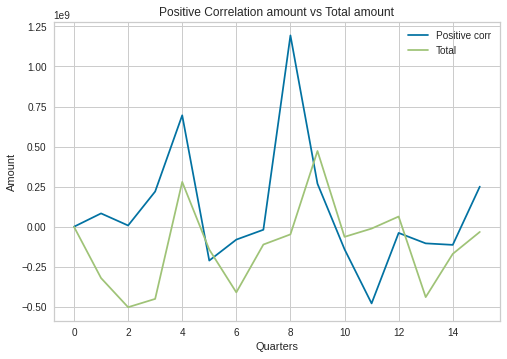

In [66]:
#multi line plot for Positive Correlation amount vs Total amount
plt.plot(corr['quaters'], corr['sep_amount'], label = "Positive corr")
plt.plot(corr['quaters'], corr['sum'], label = "Total")
#plt.fill_between(corr['quaters'], corr['sum'])
plt.legend()
plt.xlabel("Quarters")
plt.ylabel("Amount")
plt.title("Positive Correlation amount vs Total amount")
plt.show()

In [72]:
q1 = q1.reset_index()

In [75]:
count=0
total= pd.DataFrame()
dnew= pd.DataFrame()
for i in range(len(ac)) :
  a= ac[count]
  dnew =q1.loc[q1['Account_No'] == a]
  total= total.append(dnew, ignore_index=True)
  count = count + 1

In [79]:
total

,Account_No,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,correlation
0,409000611074,3,5,2,1,4,6,2,1,2,1,5,4,7,3,3,1,0.100980
1,409000611075,6,6,3,2,5,3,4,5,3,5,2,2,1,2,6,3,0.211966
2,409000611076,2,1,1,7,7,6,7,3,2,5,4,7,1,1,4,1,0.172137
3,409000611079,7,1,3,6,2,1,2,7,5,2,3,2,4,1,1,1,0.005553
4,409000611081,2,6,6,4,2,6,2,7,7,7,2,4,4,2,3,2,0.090253
5,409000611083,1,6,5,2,5,4,3,1,3,5,3,7,3,3,5,4,0.157023
6,409000611084,5,1,7,1,6,1,3,4,3,4,1,2,4,3,1,1,0.192696
7,409000611086,5,1,3,1,5,5,5,4,1,7,2,3,4,6,3,3,0.391413
8,409000611088,6,2,7,2,5,6,1,3,5,1,4,1,5,3,3,6,0.009229
9,409000611090,1,2,7,4,7,5,1,3,5,7,4,2,1,3,4,1,0.237561


In [87]:
kgb = total.drop(['correlation'], axis=1)

In [88]:
to calculate average cluster number for positively correlated accounts
a = 16
count= 0
perc =[None] * 40
for i in range(len(total)) :
  co= 0
  b= ac[count]
  c=0
  dnew =total.loc[total['Account_No'] == b]
  for i in range(a) :
    c= total[co] + c
    co = co +1
  perc[count] = c
  count = count + 1
  

[0     50
 1     58
 2     59
 3     48
 4     66
 5     60
 6     47
 7     58
 8     60
 9     57
 10    48
 11    70
 12    69
 13    58
 14    60
 15    65
 16    56
 17    63
 18    53
 19    63
 20    66
 21    59
 22    74
 23    59
 24    55
 25    52
 26    45
 27    60
 28    48
 29    63
 30    62
 31    69
 32    56
 33    67
 34    62
 35    67
 36    65
 37    53
 38    50
 39    52
 dtype: int32, 0     50
 1     58
 2     59
 3     48
 4     66
 5     60
 6     47
 7     58
 8     60
 9     57
 10    48
 11    70
 12    69
 13    58
 14    60
 15    65
 16    56
 17    63
 18    53
 19    63
 20    66
 21    59
 22    74
 23    59
 24    55
 25    52
 26    45
 27    60
 28    48
 29    63
 30    62
 31    69
 32    56
 33    67
 34    62
 35    67
 36    65
 37    53
 38    50
 39    52
 dtype: int32, 0     50
 1     58
 2     59
 3     48
 4     66
 5     60
 6     47
 7     58
 8     60
 9     57
 10    48
 11    70
 12    69
 13    58
 14    60
 15    65
 16    56
 1

In [93]:
colk = pd.DataFrame(perc)
colk

In [101]:
colk = colk.T

In [103]:
corr['avg_cluster'] = colk[0]/16

In [104]:
corr

,quaters,sum,year_quater,segme,sep_amount,avg_cluster
0,0,-5.894660e+05,0,3,-3.411610e+05,3.1250
1,1,-3.207280e+08,1,5,8.282495e+07,3.6250
2,2,-5.027165e+08,2,2,7.363177e+06,3.6875
3,3,-4.508582e+08,3,1,2.194207e+08,3.0000
4,4,2.793839e+08,0,4,6.951530e+08,4.1250
5,5,-1.429058e+08,1,6,-2.115197e+08,3.7500
6,6,-4.100853e+08,2,2,-8.071603e+07,2.9375
7,7,-1.115370e+08,3,1,-1.920424e+07,3.6250
8,8,-4.813416e+07,0,2,1.193894e+09,3.7500
9,9,4.722857e+08,1,1,2.682985e+08,3.5625
